### Capstone Project - Machine Learning Engineer at Udacity
**Author**: Ewa Nowacka <br>
**Title**: Comparision of algorithms' performance on lung CT scan dataset: CNN vs. SVM. <br>
**Key Words**: Neural Networks, Convolutional Neural Networks, Image Classification, Support Vector Machines, Data Augmentation <br>
**Day submitted**: <br>

The project consists of 6 steps:<br>
**1. Read-in lung CT scan data and data preprocessing:** <br>
    1.1. Import image data <br>
    1.2. Create labels (positive/negative for cancer) <br>
    1.3. Divide the image data into train, validation and test sets. <br>
    1.4. Convert image data to tensors. <br>
    1.5. Data augmentation <br>
<br>
**2. Testing different CNN architectures.** <br>
    2.1. Model 1 - 3 convolutional layers and 2 fully connected layers. <br>
    2.2. Model 2 - Model 1 with dropout layers, batch normalization and Global Average Pooling  Layer. <br>
    2.3. Model 3 - Model 2 but more filters and higher dropout probability.<br>
    2.4. Model 4 - Model 2 with 2 extra layers and additional dropout layer. <br>
<br>
**3. Testing different CNN architectures on augmented data.** <br>
    3.1. Model 1 with augmented data. <br>
    3.2. Model 2 - Model 1 with more layers. <br>
<br>

**4. Improving Model 1 performance with non-augmented data.** <br>
    4.1. Model 5 - Model 1 with Global Average Pooling layer. <br>
    4.2. Model 6 - Model 1 with batch normalization. <br>
    4.3. Model 7 - Model 6 with extra layers. <br>
    4.4: Model 8 - Model 7 with increased droput rate, change in filter dimensions and one extra layer.
    4.5. Model training analysis. <br>
<br>
**5. Training benchmark SVM model.** <br>
    5.1. Convert data to required format - 1D numpy array. <br>
    5.2. Use grid search alogrithm to define best SVM classifier. <br>
<br>
**6: Compare CNN and SVM performance.**<br>

First, it is necessary to import all modules to be used in the project. 

In [1]:
#IMPORTS
import numpy as np
from glob import glob
from tqdm import tqdm
import os
import shutil
import cv2

# MATPLOTLIB IMPORTS
import matplotlib.image as mpimg
import matplotlib.pyplot as plt  
%matplotlib inline

#KERAS IMPORTS
from keras.callbacks import ModelCheckpoint  
from keras.preprocessing import image    
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical  
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense,BatchNormalization,Activation
from keras.models import Sequential

# SKLEARN IMPORTS
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV

Using TensorFlow backend.


#### Step 1: Read-in lung CT scan data and data preprocessing
**STEP 1.1: Import Image Data**

In [3]:
# Read in snippets data
nodules= glob("/luna16/images/*.png")
#path="C:/Users/Ewa/Documents/Machine Learning Nanodegree/Capstone Project/Data/"
#nodules= glob(path+"/LUNA2016/images/*.png")
nodule_files=np.array(nodules)
print("There are {} nodules in total.".format(len(nodule_files)))

sum_pos=0
sum_neg=0
for file in nodule_files:
    if file[-7:-4]=="pos":
        sum_pos+=1
    else:
        sum_neg+=1

print("There are {} cancer nodules and {} non-cancer nodules.".format(sum_pos,sum_neg))

There are 2948 nodules in total.
There are 1474 cancer nodules and 1474 non-cancer nodules.


**Step 1.2: Create labels**

There are some examples of cancer nodules:


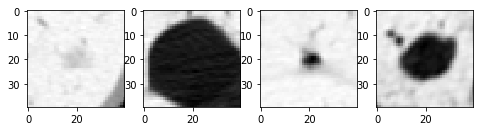

There are some examples of non-cancer nodules:


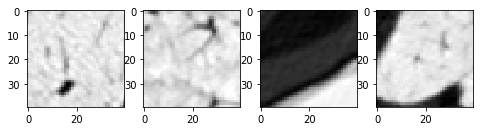

In [4]:
#Create Labels
labels=list()
for file in nodule_files:
    label=file[-7:-4]
    labels.append(label)

#Examples of cancer nodules
cancer_ex= [i for i,x in enumerate(labels) if x == 'pos'][1:5]
noncancer_ex=[i for i,x in enumerate(labels) if x == 'neg'][1:5]

print("There are some examples of cancer nodules:")
fig=plt.figure(figsize=(8,8))
columns=4
rows=1
j=1
for i in cancer_ex:
    img=mpimg.imread(nodule_files[i])
    fig.add_subplot(rows,columns,j)
    plt.imshow(img,cmap=plt.cm.binary)
    j+=1
plt.show()

print("There are some examples of non-cancer nodules:")
fig2=plt.figure(figsize=(8,8))
columns=4
rows=1
j=1
for i in noncancer_ex:
    img=mpimg.imread(nodule_files[i])
    fig2.add_subplot(rows,columns,j)
    plt.imshow(img,cmap=plt.cm.binary)
    j+=1
plt.show()


**Step 1.3: Divide the image data into train, validation and test sets.**

In [8]:
# divide data to train validation and test sets
labels_01=[1 if x=="pos" else 0 for x in labels]
categorical_labels=to_categorical(labels_01)

train_nodules, test_nodules, train_labels, test_labels = train_test_split(nodule_files,categorical_labels,test_size=0.2,train_size=0.8,stratify=categorical_labels)
train_nodules, val_nodules, train_labels, val_labels = train_test_split(train_nodules,train_labels,test_size = 0.25,train_size =0.75,stratify=train_labels)

print('Training set consists of {} CT scans, validaiton set of {} CT scans and test set consists of {} CT scans.'.format(len(train_nodules),len(val_nodules),len(test_nodules)))


Training set consists of 1768 CT scans, validaiton set of 590 CT scans and test set consists of 590 CT scans.


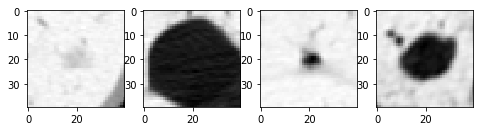

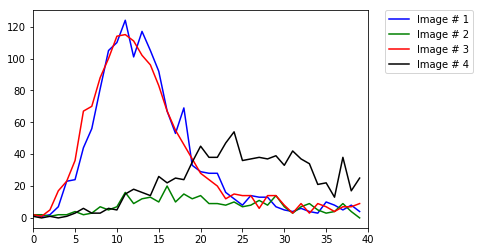

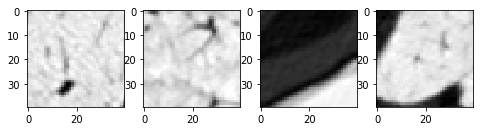

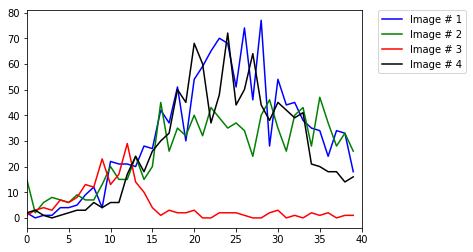

In [5]:
colors=["blue","green","red","black"]
fig3=plt.figure(figsize=(8,8))
columns3=4
rows3=1
j=1


##### CANCER ######
for n in cancer_ex:
    fig3.add_subplot(rows3,columns3,j)
    img=mpimg.imread(nodule_files[n])
    plt.imshow(img,cmap=plt.cm.binary)
    j=j+1
plt.show()


for i,n in enumerate(cancer_ex):  
    img=cv2.imread(nodule_files[n])
    histr=cv2.calcHist([img],[0], None, [40], [0,40])
    plt.plot(histr,color = colors[i],label="Image # "+str(i+1))
    plt.xlim([0,40])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
plt.show()


##### NON CANCER ######

fig4=plt.figure(figsize=(8,8))
columns4=4
rows4=1
j=1

for n in noncancer_ex:
    fig4.add_subplot(rows4,columns4,j)
    img=mpimg.imread(nodule_files[n])
    plt.imshow(img,cmap=plt.cm.binary)
    j=j+1
plt.show()

for i,n in enumerate(noncancer_ex):  
    img=cv2.imread(nodule_files[n])
    histr=cv2.calcHist([img],[0], None, [40], [0,40])
    plt.plot(histr,color = colors[i],label="Image # "+str(i+1))
    plt.xlim([0,40])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
plt.show()


**Step 1.4: Convert image data to tensors.** <br>
Required format for Keras is 4D tensor.  

In [9]:
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path)
    # convert PIL.Image.Image type to 3D tensor with shape (40, 40, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 40, 40, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

train_tensors = paths_to_tensor(train_nodules).astype('float32')/255
valid_tensors = paths_to_tensor(val_nodules).astype('float32')/255
test_tensors = paths_to_tensor(test_nodules).astype('float32')/255

100%|██████████| 590/590 [00:00<00:00, 4413.51it/s]


**Step 1.5: Data Augmentation** <br>
The following data augmentation techniques will be applied:
- rescaling: to obtain vectors with values from 0 to 1: easier to handle by the model (stability, overflow, optimization etc.)
- rotation (45 degrees): so the nodule is classified the same way even if the CT scan is rotated
- vertical flip
- horizontal flip

The below step was used only to create folders train, validation and test for image data.
In order to use keras augmentation functions, it is required that the images are already split into train, validation and test sets and they are in separate folders.

In [5]:
#Run only once on pc to create train validation and test 
folders_to_be_created = ["train","validation","test"]

source = os.getcwd()

for new_path in folders_to_be_created:
    if not os.path.exists(path+"/LUNA2016/images/"+new_path):
        os.makedirs(path+"/LUNA2016/images/"+new_path)

folders_to_be_created2 = ["pos","neg"]
for folder in folders_to_be_created:
    for new_path in folders_to_be_created2:
        if not os.path.exists(path+"/LUNA2016/images/"+folder+ "/" + new_path):
            os.makedirs(path+"/LUNA2016/images/" + folder + "/" +new_path)

In [6]:
#Run only once on pc to create train validation and test 
for nodule in train_nodules:
    index=np.where(train_nodules==nodule)
    if train_labels[index][0,0]==0 and train_labels[index][0,1]==1:
        shutil.copy(nodule, path+"\\LUNA2016\\images\\train\\pos")
    else:
        shutil.copy(nodule, path+"\\LUNA2016\\images\\train\\neg")        

In [7]:
#Run only once on pc to create train validation and test 
for nodule in test_nodules:
    index=np.where(test_nodules==nodule)
    if test_labels[index][0,0]==0 and test_labels[index][0,1]==1:
        shutil.copy(nodule, path+"\\LUNA2016\\images\\test\\pos")
    else:
        shutil.copy(nodule, path+"\\LUNA2016\\images\\test\\neg")

for nodule in val_nodules:
    index=np.where(val_nodules==nodule)
    if val_labels[index][0,0]==0 and val_labels[index][0,1]==1:
        shutil.copy(nodule, path+"\\LUNA2016\\images\\validation\\pos")
    else:
        shutil.copy(nodule, path+"\\LUNA2016\\images\\validation\\neg")

In [7]:
#train_tensors = paths_to_tensor(path+"\LUNA2016\images\train").astype('float32')/255
#valid_tensors = paths_to_tensor(path+"\\LUNA2016\\images\\test").astype('float32')/255
#test_tensors = paths_to_tensor(path+"\\LUNA2016\\images\\validate").astype('float32')/255

batch_size = 16

#augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=45,
        horizontal_flip=True, vertical_flip=True)
#path+"\\LUNA2016\\images\\train\\", 
# generate batches of augmented image data from train directory
train_generator = train_datagen.flow_from_directory(
        '/luna16/images/train',
        target_size=(40, 40),
        batch_size=batch_size,
        class_mode='binary') 

test_datagen = ImageDataGenerator(rescale=1./255)

#for validation data
validation_generator = test_datagen.flow_from_directory(
        #path+"\\LUNA2016\\images\\validation\\", 
        "/luna16/images/validation",
        target_size=(40, 40),
        batch_size=batch_size,
       class_mode='binary')


Found 1768 images belonging to 2 classes.
Found 590 images belonging to 2 classes.


#### Step 2: Testing different CNN architectures.
**Step 2.1. Model 1: 3 convolutional layers and 2 fully connected layers.** <br> 

First, we will train a simple CNN architecture with 3 convolutional layers and 2 fully connected layers. Then, we will compare the results obtained with augmented and non-augmented data. First, the original data with no augmentation techniques will be used. 

In [10]:
model = Sequential()

model.add(Conv2D(32, (2, 2), activation='relu', input_shape=(40,40,3)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 39, 39, 32)        416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 32)          0         
__________

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
epochs = 80

checkpointer = ModelCheckpoint(filepath='weights.3CL.NOAUG.hdf5', 
                               verbose=1, save_best_only=True)

#model.fit_generator(datagen, samples_per_epoch=len(train_tensors), 
          #validation_data=(valid_tensors, val_labels),
          #epochs=epochs, callbacks=[checkpointer], verbose=1)
        
history1=model.fit(train_tensors, train_labels, 
          validation_data=(valid_tensors, val_labels),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 1768 samples, validate on 590 samples
Epoch 1/80
1768/1768 [==============================] - 1s 460us/step - loss: 9.2928e-04 - acc: 0.9994 - val_loss: 0.3132 - val_acc: 0.9610

Epoch 00001: val_loss improved from inf to 0.31316, saving model to weights.3CL.NOAUG.hdf5
Epoch 2/80
1768/1768 [==============================] - 1s 473us/step - loss: 6.9624e-04 - acc: 1.0000 - val_loss: 0.3019 - val_acc: 0.9610

Epoch 00002: val_loss improved from 0.31316 to 0.30186, saving model to weights.3CL.NOAUG.hdf5
Epoch 3/80
1768/1768 [==============================] - 1s 474us/step - loss: 5.3889e-04 - acc: 1.0000 - val_loss: 0.3032 - val_acc: 0.9644

Epoch 00003: val_loss did not improve from 0.30186
Epoch 4/80
1768/1768 [==============================] - 1s 468us/step - loss: 0.0057 - acc: 0.9977 - val_loss: 0.3225 - val_acc: 0.9508

Epoch 00004: val_loss did not improve from 0.30186
Epoch 5/80
1768/1768 [==============================] - 1s 462us/step - loss: 0.0040 - acc: 0.9983 - val_

1768/1768 [==============================] - 1s 457us/step - loss: 0.0110 - acc: 0.9977 - val_loss: 0.3160 - val_acc: 0.9559

Epoch 00043: val_loss did not improve from 0.24301
Epoch 44/80
1768/1768 [==============================] - 1s 453us/step - loss: 0.0054 - acc: 0.9983 - val_loss: 0.3123 - val_acc: 0.9610

Epoch 00044: val_loss did not improve from 0.24301
Epoch 45/80
1768/1768 [==============================] - 1s 458us/step - loss: 0.0032 - acc: 0.9989 - val_loss: 0.3338 - val_acc: 0.9576

Epoch 00045: val_loss did not improve from 0.24301
Epoch 46/80
1768/1768 [==============================] - 1s 458us/step - loss: 0.0083 - acc: 0.9977 - val_loss: 0.3094 - val_acc: 0.9593

Epoch 00046: val_loss did not improve from 0.24301
Epoch 47/80
1768/1768 [==============================] - 1s 457us/step - loss: 0.0032 - acc: 0.9989 - val_loss: 0.2876 - val_acc: 0.9644

Epoch 00047: val_loss did not improve from 0.24301
Epoch 48/80
1768/1768 [==============================] - 1s 457us/s

In [66]:
model_pred = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

test_accuracy = 100*np.sum(np.array(model_pred)==np.argmax(test_labels, axis=1))/len(model_pred)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 97.7966%


**Step 2.2: Model 2 - Model 1 with dropout layers, batch normalization and reGlobal Average Pooling Layer.** <br>
This time, another droput layer was added: for the last epochs we do not see much improvement and it could be a sign of overfitting. Also, to speed up the learning process, batch normalization technique was used. Another change to the first model was having Global Average Pooling layer instead of Faltten layer: it reduces number of parameters and it is another way to reduce the risk of overfitting.

In [14]:
from keras.layers import BatchNormalization,Activation

model2 = Sequential()

model2.add(Conv2D(32, (2, 2), input_shape=(40,40,3)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.4))
 
model2.add(GlobalAveragePooling2D())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(2, activation='softmax'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 39, 39, 32)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 19, 19, 32)        128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 19, 19, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 17, 17, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
__________

We have reduced the number of parameters from 84,546 to 20,290.

In [15]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
epochs = 50
checkpointer = ModelCheckpoint(filepath='weights.3CL2.NOAUG.hdf5', 
                               verbose=1, save_best_only=True)

model2.fit(train_tensors, train_labels, 
          validation_data=(valid_tensors, val_labels),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 1768 samples, validate on 590 samples
Epoch 1/50
1768/1768 [==============================] - 2s 918us/step - loss: 0.6636 - acc: 0.5871 - val_loss: 0.6566 - val_acc: 0.6881

Epoch 00001: val_loss improved from inf to 0.65662, saving model to weights.3CL2.NOAUG.hdf5
Epoch 2/50
1768/1768 [==============================] - 1s 472us/step - loss: 0.5898 - acc: 0.6895 - val_loss: 0.5844 - val_acc: 0.7254

Epoch 00002: val_loss improved from 0.65662 to 0.58437, saving model to weights.3CL2.NOAUG.hdf5
Epoch 3/50
1768/1768 [==============================] - 1s 478us/step - loss: 0.5331 - acc: 0.7517 - val_loss: 0.5247 - val_acc: 0.7864

Epoch 00003: val_loss improved from 0.58437 to 0.52466, saving model to weights.3CL2.NOAUG.hdf5
Epoch 4/50
1768/1768 [==============================] - 1s 479us/step - loss: 0.4751 - acc: 0.7907 - val_loss: 0.4842 - val_acc: 0.8186

Epoch 00004: val_loss improved from 0.52466 to 0.48417, saving model to weights.3CL2.NOAUG.hdf5
Epoch 5/50
1768/1768 [===

Epoch 39/50
1768/1768 [==============================] - 1s 470us/step - loss: 0.2174 - acc: 0.9135 - val_loss: 0.1911 - val_acc: 0.9186

Epoch 00039: val_loss improved from 0.19477 to 0.19114, saving model to weights.3CL2.NOAUG.hdf5
Epoch 40/50
1768/1768 [==============================] - 1s 474us/step - loss: 0.2134 - acc: 0.9072 - val_loss: 0.1927 - val_acc: 0.9203

Epoch 00040: val_loss did not improve from 0.19114
Epoch 41/50
1768/1768 [==============================] - 1s 472us/step - loss: 0.2055 - acc: 0.9140 - val_loss: 0.2201 - val_acc: 0.9186

Epoch 00041: val_loss did not improve from 0.19114
Epoch 42/50
1768/1768 [==============================] - 1s 473us/step - loss: 0.1925 - acc: 0.9152 - val_loss: 0.2326 - val_acc: 0.9034

Epoch 00042: val_loss did not improve from 0.19114
Epoch 43/50
1768/1768 [==============================] - 1s 470us/step - loss: 0.2108 - acc: 0.9089 - val_loss: 0.1879 - val_acc: 0.9271

Epoch 00043: val_loss improved from 0.19114 to 0.18792, savin

In [17]:
model2_pred = [np.argmax(model2.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

test_accuracy2 = 100*np.sum(np.array(model2_pred)==np.argmax(test_labels, axis=1))/len(model2_pred)
print('Test accuracy: %.4f%%' % test_accuracy2)

Test accuracy: 92.2034%


The model accuracy on test data dropped from 96.9492% to 92.2034%.

**Step 2.3: Model 3 - Model 2 but more filters and higher dropout probability.** <br>
For Model 3 the dropout probability was increased to 0.5 and more filters were used: 32, 64, 128.

In [18]:
model3 = Sequential()

model3.add(Conv2D(32, (2, 2), input_shape=(40,40,3)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Activation('relu'))

model3.add(Conv2D(64, (3, 3)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Activation('relu'))

model3.add(Conv2D(128, (3, 3)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Activation('relu'))

model3.add(GlobalAveragePooling2D())
model3.add(Dense(32, activation='relu'))
model3.add(Dense(2, activation='softmax'))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 39, 39, 32)        416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 19, 19, 32)        128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 19, 19, 32)        0         
_________________________________________________________________
activation_3 (Activation)    (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [19]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
checkpointer = ModelCheckpoint(filepath='weights.3CL3.NOAUG.hdf5', 
                               verbose=1, save_best_only=True)

model3.fit(train_tensors, train_labels, 
          validation_data=(valid_tensors, val_labels),
          epochs=40, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 1768 samples, validate on 590 samples
Epoch 1/40
1768/1768 [==============================] - 2s 1ms/step - loss: 0.6440 - acc: 0.6250 - val_loss: 0.6686 - val_acc: 0.5576

Epoch 00001: val_loss improved from inf to 0.66857, saving model to weights.3CL3.NOAUG.hdf5
Epoch 2/40
1768/1768 [==============================] - 1s 559us/step - loss: 0.5712 - acc: 0.6985 - val_loss: 0.6318 - val_acc: 0.6407

Epoch 00002: val_loss improved from 0.66857 to 0.63175, saving model to weights.3CL3.NOAUG.hdf5
Epoch 3/40
1768/1768 [==============================] - 1s 548us/step - loss: 0.5086 - acc: 0.7732 - val_loss: 0.6411 - val_acc: 0.6254

Epoch 00003: val_loss did not improve from 0.63175
Epoch 4/40
1768/1768 [==============================] - 1s 550us/step - loss: 0.4522 - acc: 0.7952 - val_loss: 0.4687 - val_acc: 0.7898

Epoch 00004: val_loss improved from 0.63175 to 0.46873, saving model to weights.3CL3.NOAUG.hdf5
Epoch 5/40
1768/1768 [==============================] - 1s 543us/step - 

In [21]:
model3_pred = [np.argmax(model3.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

test_accuracy3 = 100*np.sum(np.array(model3_pred)==np.argmax(test_labels, axis=1))/len(model3_pred)
print('Test accuracy: %.4f%%' % test_accuracy3)

Test accuracy: 92.2034%


no change observed for Model 3.

**Step 2.4: Model 4 - Model 2 with 2 extra layers and additional dropout layer.**
Instead of having more filters, two more layers were added: dropout tends to work better on larger networks. Also, a dropout layer was applied to the first fully connected layer. This time the model is trained for 100 epochs; it should increase the model accuracy.

In [22]:
model4 = Sequential()

model4.add(Conv2D(32, (2, 2),input_shape=(40,40,3)))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Activation('relu'))

model4.add(Conv2D(32, (3, 3)))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Activation('relu'))

model4.add(Conv2D(32, (3, 3)))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Activation('relu'))

model4.add(Conv2D(32, (2, 2)))
model4.add(MaxPooling2D(pool_size=(1,1)))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Activation('relu'))

model4.add(Conv2D(32, (2, 2)))
model4.add(MaxPooling2D(pool_size=(1,1)))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Activation('relu'))
 
model4.add(GlobalAveragePooling2D())
model4.add(Dense(32, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(2, activation='softmax'))

model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 39, 39, 32)        416       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 19, 19, 32)        128       
_________________________________________________________________
dropout_9 (Dropout)          (None, 19, 19, 32)        0         
_________________________________________________________________
activation_6 (Activation)    (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 17, 17, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 32)          0         
__________

In [23]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
checkpointer = ModelCheckpoint(filepath='weights.4CL3.NOAUG.hdf5', 
                               verbose=1, save_best_only=True)

model4.fit(train_tensors, train_labels, 
          validation_data=(valid_tensors, val_labels),
          epochs=50, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 1768 samples, validate on 590 samples
Epoch 1/50
1768/1768 [==============================] - 3s 2ms/step - loss: 1.0492 - acc: 0.5028 - val_loss: 0.6890 - val_acc: 0.5237

Epoch 00001: val_loss improved from inf to 0.68900, saving model to weights.4CL3.NOAUG.hdf5
Epoch 2/50
1768/1768 [==============================] - 1s 761us/step - loss: 0.9197 - acc: 0.5096 - val_loss: 0.6922 - val_acc: 0.5051

Epoch 00002: val_loss did not improve from 0.68900
Epoch 3/50
1768/1768 [==============================] - 1s 764us/step - loss: 0.8669 - acc: 0.5028 - val_loss: 0.6903 - val_acc: 0.5390

Epoch 00003: val_loss did not improve from 0.68900
Epoch 4/50
1768/1768 [==============================] - 1s 752us/step - loss: 0.7753 - acc: 0.5390 - val_loss: 0.6911 - val_acc: 0.5203

Epoch 00004: val_loss did not improve from 0.68900
Epoch 5/50
1768/1768 [==============================] - 1s 765us/step - loss: 0.7637 - acc: 0.5057 - val_loss: 0.6910 - val_acc: 0.5068

Epoch 00005: val_loss did

1768/1768 [==============================] - 1s 765us/step - loss: 0.3771 - acc: 0.8490 - val_loss: 0.3323 - val_acc: 0.8712

Epoch 00039: val_loss improved from 0.35213 to 0.33229, saving model to weights.4CL3.NOAUG.hdf5
Epoch 40/50
1768/1768 [==============================] - 1s 758us/step - loss: 0.3501 - acc: 0.8665 - val_loss: 0.3173 - val_acc: 0.8831

Epoch 00040: val_loss improved from 0.33229 to 0.31726, saving model to weights.4CL3.NOAUG.hdf5
Epoch 41/50
1768/1768 [==============================] - 1s 764us/step - loss: 0.3517 - acc: 0.8479 - val_loss: 0.3451 - val_acc: 0.8661

Epoch 00041: val_loss did not improve from 0.31726
Epoch 42/50
1768/1768 [==============================] - 1s 759us/step - loss: 0.3282 - acc: 0.8688 - val_loss: 0.3097 - val_acc: 0.8831

Epoch 00042: val_loss improved from 0.31726 to 0.30970, saving model to weights.4CL3.NOAUG.hdf5
Epoch 43/50
1768/1768 [==============================] - 1s 759us/step - loss: 0.3270 - acc: 0.8722 - val_loss: 0.3154 - 

In [25]:
model4_pred = [np.argmax(model4.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

test_accuracy4 = 100*np.sum(np.array(model4_pred)==np.argmax(test_labels, axis=1))/len(model4_pred)
print('Test accuracy: %.4f%%' % test_accuracy4)

Test accuracy: 90.3390%


So far, Model 4 achieved the worst accuracy.

#### STEP 3: Testing different CNN architectures on augmented data.
** Step 3.1: Model 1 with augmented data.** <br>
The best model is the first model we trained; the modifications that were applied did not improve the performance. Now we will test if the first model will perform better if we use
augmented data for training.

In [26]:
model_AUG = Sequential()

model_AUG.add(Conv2D(32, (2, 2), activation='relu', input_shape=(40,40,3)))
model_AUG.add(Conv2D(32, (3, 3), activation='relu'))
model_AUG.add(MaxPooling2D(pool_size=(2,2)))
model_AUG.add(Dropout(0.4))
model_AUG.add(Conv2D(32, (3, 3), activation='relu'))
model_AUG.add(MaxPooling2D(pool_size=(2,2)))
model_AUG.add(Dropout(0.4))
 
model_AUG.add(Flatten())
model_AUG.add(Dense(32, activation='relu'))
model_AUG.add(Dense(1, activation='softmax'))

model_AUG.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 39, 39, 32)        416       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 8, 8, 32)          0         
__________

In [27]:
model_AUG.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
checkpointer = ModelCheckpoint(filepath='weights.3CL.AUG.hdf5', 
                               verbose=1, save_best_only=True)

history=model_AUG.fit_generator(train_generator, steps_per_epoch=100, epochs=80,
          validation_data=validation_generator,
          validation_steps=100, callbacks=[checkpointer], verbose=1)

Epoch 1/80
100/100 [==============================] - 3s 25ms/step - loss: 7.8714 - acc: 0.5063 - val_loss: 7.7814 - val_acc: 0.5119

Epoch 00001: val_loss improved from inf to 7.78140, saving model to weights.3CL.AUG.hdf5
Epoch 2/80
100/100 [==============================] - 2s 24ms/step - loss: 7.9115 - acc: 0.5037 - val_loss: 7.7514 - val_acc: 0.5138

Epoch 00002: val_loss improved from 7.78140 to 7.75144, saving model to weights.3CL.AUG.hdf5
Epoch 3/80
100/100 [==============================] - 2s 24ms/step - loss: 7.7818 - acc: 0.5119 - val_loss: 7.7414 - val_acc: 0.5144

Epoch 00003: val_loss improved from 7.75144 to 7.74145, saving model to weights.3CL.AUG.hdf5
Epoch 4/80
100/100 [==============================] - 2s 24ms/step - loss: 7.7719 - acc: 0.5125 - val_loss: 7.8813 - val_acc: 0.5056

Epoch 00004: val_loss did not improve from 7.74145
Epoch 5/80
100/100 [==============================] - 2s 24ms/step - loss: 7.9314 - acc: 0.5025 - val_loss: 7.7015 - val_acc: 0.5169

Epoc

100/100 [==============================] - 2s 24ms/step - loss: 7.7221 - acc: 0.5156 - val_loss: 7.8214 - val_acc: 0.5094

Epoch 00044: val_loss did not improve from 7.65155
Epoch 45/80
100/100 [==============================] - 2s 24ms/step - loss: 8.1008 - acc: 0.4919 - val_loss: 7.8613 - val_acc: 0.5069

Epoch 00045: val_loss did not improve from 7.65155
Epoch 46/80
100/100 [==============================] - 2s 24ms/step - loss: 7.7519 - acc: 0.5138 - val_loss: 7.8313 - val_acc: 0.5088

Epoch 00046: val_loss did not improve from 7.65155
Epoch 47/80
100/100 [==============================] - 2s 24ms/step - loss: 7.8217 - acc: 0.5094 - val_loss: 7.7614 - val_acc: 0.5132

Epoch 00047: val_loss did not improve from 7.65155
Epoch 48/80
100/100 [==============================] - 2s 24ms/step - loss: 8.0410 - acc: 0.4956 - val_loss: 7.8313 - val_acc: 0.5088

Epoch 00048: val_loss did not improve from 7.65155
Epoch 49/80
100/100 [==============================] - 2s 24ms/step - loss: 7.6922

In [30]:
modelAUG_pred = [np.argmax(model_AUG.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

test_accuracy_AUG = 100*np.sum(np.array(modelAUG_pred)==np.argmax(test_labels, axis=1))/len(modelAUG_pred)
print('Test accuracy: %.4f%%' % test_accuracy_AUG)

Test accuracy: 50.0000%


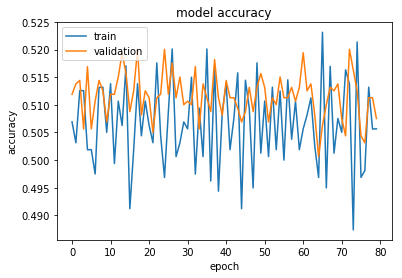

In [32]:
# Training history
#accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

We obtained very poor accuracy of 50% meaning that the model with augmented data is no better than random chance.
However, after further analysis it actually makes sense. If we apply augmentation to CT scan data, it can potentially change the labeling.
Anyway, we will try to add some modifications to our model to see if we can improve the performance.

**STEP 3.2: Model 2 - Model 1 with more layers.**

In [33]:
model_AUG2 = Sequential()

model_AUG2.add(Conv2D(32, (2, 2), activation='relu', input_shape=(40,40,3)))

model_AUG2.add(Conv2D(32, (3, 3), activation='relu'))
model_AUG2.add(MaxPooling2D(pool_size=(2,2)))
model_AUG2.add(BatchNormalization())
model_AUG2.add(Dropout(0.4))

model_AUG2.add(Conv2D(32, (3, 3), activation='relu'))
model_AUG2.add(MaxPooling2D(pool_size=(2,2)))
model_AUG2.add(BatchNormalization())
model_AUG2.add(Dropout(0.4))

model_AUG2.add(Conv2D(32, (3, 3), activation='relu'))
model_AUG2.add(MaxPooling2D(pool_size=(2,2)))
model_AUG2.add(BatchNormalization())
model_AUG2.add(Dropout(0.4))

model_AUG2.add(Conv2D(32, (3, 3), activation='relu'))
model_AUG2.add(MaxPooling2D(pool_size=(1,1)))
model_AUG2.add(BatchNormalization())
model_AUG2.add(Dropout(0.4))
    
model_AUG2.add(GlobalAveragePooling2D())
model_AUG2.add(Dense(32, activation='relu'))
model_AUG2.add(Dense(1, activation='softmax'))

model_AUG2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 39, 39, 32)        416       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 18, 18, 32)        128       
_________________________________________________________________
dropout_17 (Dropout)         (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 32)          0         
__________

In [34]:
model_AUG2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
checkpointer = ModelCheckpoint(filepath='weights.3CL.AUG2.hdf5', 
                               verbose=1, save_best_only=True)

history2=model_AUG2.fit_generator(train_generator, steps_per_epoch=80, epochs=100,
          validation_data=validation_generator,
          validation_steps=100, callbacks=[checkpointer], verbose=1)

Epoch 1/100
80/80 [==============================] - 4s 47ms/step - loss: 7.7218 - acc: 0.5156 - val_loss: 7.8413 - val_acc: 0.5081

Epoch 00001: val_loss improved from inf to 7.84134, saving model to weights.3CL.AUG2.hdf5
Epoch 2/100
80/80 [==============================] - 2s 28ms/step - loss: 7.9587 - acc: 0.5008 - val_loss: 7.8513 - val_acc: 0.5075

Epoch 00002: val_loss did not improve from 7.84134
Epoch 3/100
80/80 [==============================] - 2s 28ms/step - loss: 7.8465 - acc: 0.5078 - val_loss: 7.7914 - val_acc: 0.5113

Epoch 00003: val_loss improved from 7.84134 to 7.79139, saving model to weights.3CL.AUG2.hdf5
Epoch 4/100
80/80 [==============================] - 2s 28ms/step - loss: 7.9467 - acc: 0.5015 - val_loss: 7.7714 - val_acc: 0.5125

Epoch 00004: val_loss improved from 7.79139 to 7.77141, saving model to weights.3CL.AUG2.hdf5
Epoch 5/100
80/80 [==============================] - 2s 29ms/step - loss: 7.8715 - acc: 0.5063 - val_loss: 7.7514 - val_acc: 0.5138

Epoch 

80/80 [==============================] - 2s 30ms/step - loss: 7.7468 - acc: 0.5141 - val_loss: 7.7914 - val_acc: 0.5113

Epoch 00044: val_loss did not improve from 7.66153
Epoch 45/100
80/80 [==============================] - 2s 28ms/step - loss: 8.2452 - acc: 0.4828 - val_loss: 7.6715 - val_acc: 0.5188

Epoch 00045: val_loss did not improve from 7.66153
Epoch 46/100
80/80 [==============================] - 2s 27ms/step - loss: 7.7842 - acc: 0.5117 - val_loss: 7.8413 - val_acc: 0.5081

Epoch 00046: val_loss did not improve from 7.66153
Epoch 47/100
80/80 [==============================] - 2s 27ms/step - loss: 7.6601 - acc: 0.5195 - val_loss: 7.8114 - val_acc: 0.5100

Epoch 00047: val_loss did not improve from 7.66153
Epoch 48/100
80/80 [==============================] - 2s 29ms/step - loss: 7.8965 - acc: 0.5047 - val_loss: 7.7914 - val_acc: 0.5113

Epoch 00048: val_loss did not improve from 7.66153
Epoch 49/100
80/80 [==============================] - 2s 27ms/step - loss: 7.7965 - acc:

In [36]:
modelAUG2_pred = [np.argmax(model_AUG2.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

test_accuracy_AUG2 = 100*np.sum(np.array(modelAUG2_pred)==np.argmax(test_labels, axis=1))/len(modelAUG2_pred)
print('Test accuracy: %.4f%%' % test_accuracy_AUG2)

Test accuracy: 50.0000%


The performance with augmented data is much worse. Therefore, we will go back to the first model we trained and try to improve the performance.

#### STEP 4: Improving Model 1 performance with non-augmented data.
**Step 4.1: Model 5 - Model 1 with Global Average Pooling layer.**

This time the change will be made step by step to see the separate effect of each modification.
First, let's see if replacing Flatting layer with Global Average pooling improves the performance.

In [26]:
model5 = Sequential()

model5.add(Conv2D(32, (2, 2), activation='relu', input_shape=(40,40,3)))

model5.add(Conv2D(32, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.4))

model5.add(Conv2D(32, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.4))
 
model5.add(GlobalAveragePooling2D())
model5.add(Dense(32, activation='relu'))
model5.add(Dense(2, activation='softmax'))

model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 39, 39, 32)        416       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 8, 8, 32)          0         
__________

In [27]:
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
checkpointer = ModelCheckpoint(filepath='weights.5CL.hdf5', 
                               verbose=1, save_best_only=True)

history5=model5.fit(train_tensors, train_labels, 
          validation_data=(valid_tensors, val_labels),
          epochs=50, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 1768 samples, validate on 590 samples
Epoch 1/50
1768/1768 [==============================] - 2s 867us/step - loss: 0.6832 - acc: 0.5226 - val_loss: 0.6696 - val_acc: 0.5627

Epoch 00001: val_loss improved from inf to 0.66956, saving model to weights.5CL.hdf5
Epoch 2/50
1768/1768 [==============================] - 1s 426us/step - loss: 0.6421 - acc: 0.6267 - val_loss: 0.6341 - val_acc: 0.6373

Epoch 00002: val_loss improved from 0.66956 to 0.63412, saving model to weights.5CL.hdf5
Epoch 3/50
1768/1768 [==============================] - 1s 429us/step - loss: 0.6162 - acc: 0.6623 - val_loss: 0.6455 - val_acc: 0.6661

Epoch 00003: val_loss did not improve from 0.63412
Epoch 4/50
1768/1768 [==============================] - 1s 435us/step - loss: 0.5886 - acc: 0.7002 - val_loss: 0.5957 - val_acc: 0.6831

Epoch 00004: val_loss improved from 0.63412 to 0.59566, saving model to weights.5CL.hdf5
Epoch 5/50
1768/1768 [==============================] - 1s 430us/step - loss: 0.5610 - acc:

1768/1768 [==============================] - 1s 425us/step - loss: 0.3229 - acc: 0.8575 - val_loss: 0.3572 - val_acc: 0.8475

Epoch 00040: val_loss did not improve from 0.34742
Epoch 41/50
1768/1768 [==============================] - 1s 428us/step - loss: 0.3195 - acc: 0.8597 - val_loss: 0.3766 - val_acc: 0.8356

Epoch 00041: val_loss did not improve from 0.34742
Epoch 42/50
1768/1768 [==============================] - 1s 424us/step - loss: 0.3164 - acc: 0.8569 - val_loss: 0.3686 - val_acc: 0.8475

Epoch 00042: val_loss did not improve from 0.34742
Epoch 43/50
1768/1768 [==============================] - 1s 433us/step - loss: 0.3244 - acc: 0.8569 - val_loss: 0.3566 - val_acc: 0.8458

Epoch 00043: val_loss did not improve from 0.34742
Epoch 44/50
1768/1768 [==============================] - 1s 426us/step - loss: 0.3146 - acc: 0.8614 - val_loss: 0.3593 - val_acc: 0.8508

Epoch 00044: val_loss did not improve from 0.34742
Epoch 45/50
1768/1768 [==============================] - 1s 430us/s

In [29]:
model5_pred = [np.argmax(model5.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

test_accuracy_model5 = 100*np.sum(np.array(model5_pred)==np.argmax(test_labels, axis=1))/len(model5_pred)
print('Test accuracy: %.4f%%' % test_accuracy_model5)

Test accuracy: 83.3898%


Flatten layer works better than Global Average Pooling Layer, therefore we will go back to Flatten layer and try batch normalization.

** Step 4.2: Model 6 - Model 1 with batch normalization. **

In [30]:
model6 = Sequential()

model6.add(Conv2D(32, (2, 2), activation='relu', input_shape=(40,40,3)))

model6.add(Conv2D(32, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(BatchNormalization())
model6.add(Dropout(0.4))

model6.add(Conv2D(32, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(BatchNormalization())
model6.add(Dropout(0.4))
 
model6.add(Flatten())
model6.add(Dense(32, activation='relu'))
model6.add(Dense(2, activation='softmax'))

model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 39, 39, 32)        416       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 18, 18, 32)        128       
_________________________________________________________________
dropout_17 (Dropout)         (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 32)          0         
__________

In [31]:
model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
checkpointer = ModelCheckpoint(filepath='weights.6CL.hdf5', 
                               verbose=1, save_best_only=True)

history6=model6.fit(train_tensors, train_labels, 
          validation_data=(valid_tensors, val_labels),
          epochs=80, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 1768 samples, validate on 590 samples
Epoch 1/80
1768/1768 [==============================] - 2s 1ms/step - loss: 0.4834 - acc: 0.8094 - val_loss: 0.3528 - val_acc: 0.8576

Epoch 00001: val_loss improved from inf to 0.35278, saving model to weights.6CL.hdf5
Epoch 2/80
1768/1768 [==============================] - 1s 509us/step - loss: 0.3294 - acc: 0.8722 - val_loss: 0.3500 - val_acc: 0.8847

Epoch 00002: val_loss improved from 0.35278 to 0.35003, saving model to weights.6CL.hdf5
Epoch 3/80
1768/1768 [==============================] - 1s 512us/step - loss: 0.2784 - acc: 0.8874 - val_loss: 0.2751 - val_acc: 0.9051

Epoch 00003: val_loss improved from 0.35003 to 0.27510, saving model to weights.6CL.hdf5
Epoch 4/80
1768/1768 [==============================] - 1s 512us/step - loss: 0.2191 - acc: 0.9169 - val_loss: 0.3967 - val_acc: 0.8644

Epoch 00004: val_loss did not improve from 0.27510
Epoch 5/80
1768/1768 [==============================] - 1s 516us/step - loss: 0.1909 - acc: 0

1768/1768 [==============================] - 1s 507us/step - loss: 0.0246 - acc: 0.9938 - val_loss: 0.2202 - val_acc: 0.9475

Epoch 00043: val_loss did not improve from 0.17541
Epoch 44/80
1768/1768 [==============================] - 1s 512us/step - loss: 0.0328 - acc: 0.9893 - val_loss: 0.2426 - val_acc: 0.9508

Epoch 00044: val_loss did not improve from 0.17541
Epoch 45/80
1768/1768 [==============================] - 1s 512us/step - loss: 0.0390 - acc: 0.9859 - val_loss: 0.1920 - val_acc: 0.9559

Epoch 00045: val_loss did not improve from 0.17541
Epoch 46/80
1768/1768 [==============================] - 1s 514us/step - loss: 0.0218 - acc: 0.9938 - val_loss: 0.2252 - val_acc: 0.9576

Epoch 00046: val_loss did not improve from 0.17541
Epoch 47/80
1768/1768 [==============================] - 1s 510us/step - loss: 0.0221 - acc: 0.9915 - val_loss: 0.2406 - val_acc: 0.9441

Epoch 00047: val_loss did not improve from 0.17541
Epoch 48/80
1768/1768 [==============================] - 1s 511us/s

In [33]:
model6.load_weights('weights.6CL.hdf5')
model6_pred = [np.argmax(model6.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

test_accuracy_model6 = 100*np.sum(np.array(model6_pred)==np.argmax(test_labels, axis=1))/len(model6_pred)
print('Test accuracy: %.4f%%' % test_accuracy_model6)

Test accuracy: 96.4407%


In [34]:
test_labels_CNN=np.argmax(test_labels,axis=1)

The accuraccy is still lower than for Model 1 and our benchmark.

**Step 4.3: Model 7 - add extra layers to Model 6.** <br>
Testing if more layers can give us increase in accuracy.

In [35]:
model7 = Sequential()

model7.add(Conv2D(32, (2, 2), activation='relu', input_shape=(40,40,3)))

model7.add(Conv2D(32, (3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2,2)))
model7.add(BatchNormalization())
model7.add(Dropout(0.4))

model7.add(Conv2D(32, (3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2,2)))
model7.add(BatchNormalization())
model7.add(Dropout(0.4))

model7.add(Conv2D(32, (3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2,2)))
model7.add(BatchNormalization())
model7.add(Dropout(0.4))
 
model7.add(Flatten())
model7.add(Dense(32, activation='relu'))
model7.add(Dense(2, activation='softmax'))

model7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 39, 39, 32)        416       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 18, 18, 32)        128       
_________________________________________________________________
dropout_19 (Dropout)         (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 32)          0         
__________

In [36]:
model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='weights.7CL.hdf5', 
                               verbose=1, save_best_only=True)

history7=model7.fit(train_tensors, train_labels, 
          validation_data=(valid_tensors, val_labels),
          epochs=80, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 1768 samples, validate on 590 samples
Epoch 1/80
1768/1768 [==============================] - 2s 1ms/step - loss: 0.6160 - acc: 0.7460 - val_loss: 0.4068 - val_acc: 0.8237

Epoch 00001: val_loss improved from inf to 0.40680, saving model to weights.7CL.hdf5
Epoch 2/80
1768/1768 [==============================] - 1s 596us/step - loss: 0.4229 - acc: 0.8224 - val_loss: 0.3765 - val_acc: 0.8441

Epoch 00002: val_loss improved from 0.40680 to 0.37649, saving model to weights.7CL.hdf5
Epoch 3/80
1768/1768 [==============================] - 1s 598us/step - loss: 0.3875 - acc: 0.8416 - val_loss: 0.3186 - val_acc: 0.8763

Epoch 00003: val_loss improved from 0.37649 to 0.31855, saving model to weights.7CL.hdf5
Epoch 4/80
1768/1768 [==============================] - 1s 596us/step - loss: 0.3013 - acc: 0.8795 - val_loss: 0.2793 - val_acc: 0.8949

Epoch 00004: val_loss improved from 0.31855 to 0.27934, saving model to weights.7CL.hdf5
Epoch 5/80
1768/1768 [==============================] -

1768/1768 [==============================] - 1s 594us/step - loss: 0.0751 - acc: 0.9706 - val_loss: 0.2972 - val_acc: 0.9254

Epoch 00041: val_loss did not improve from 0.12337
Epoch 42/80
1768/1768 [==============================] - 1s 595us/step - loss: 0.0679 - acc: 0.9712 - val_loss: 0.1339 - val_acc: 0.9525

Epoch 00042: val_loss did not improve from 0.12337
Epoch 43/80
1768/1768 [==============================] - 1s 590us/step - loss: 0.0715 - acc: 0.9729 - val_loss: 0.1658 - val_acc: 0.9475

Epoch 00043: val_loss did not improve from 0.12337
Epoch 44/80
1768/1768 [==============================] - 1s 593us/step - loss: 0.0708 - acc: 0.9734 - val_loss: 0.1567 - val_acc: 0.9475

Epoch 00044: val_loss did not improve from 0.12337
Epoch 45/80
1768/1768 [==============================] - 1s 593us/step - loss: 0.0698 - acc: 0.9706 - val_loss: 0.2114 - val_acc: 0.9356

Epoch 00045: val_loss did not improve from 0.12337
Epoch 46/80
1768/1768 [==============================] - 1s 594us/s

In [37]:
model7_pred = [np.argmax(model7.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

test_accuracy_model7 = 100*np.sum(np.array(model7_pred)==np.argmax(test_labels, axis=1))/len(model7_pred)
print('Test accuracy: %.4f%%' % test_accuracy_model7)

Test accuracy: 95.5932%


**Step 4.4: Model 8 - decrease droput rate, change filter dimensions, add one layer.** <br>

In [42]:
model8 = Sequential()

model8.add(Conv2D(32, (3, 3), activation='relu', input_shape=(40,40,3)))

model8.add(Conv2D(32, (3, 3), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2,2)))
model8.add(BatchNormalization())
model8.add(Dropout(0.3))

model8.add(Conv2D(32, (2, 2), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2,2)))
model8.add(BatchNormalization())
model8.add(Dropout(0.3))

model8.add(Conv2D(32, (2, 2), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2,2)))
model8.add(BatchNormalization())
model8.add(Dropout(0.3))

model8.add(Conv2D(32, (2, 2), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2,2)))
model8.add(BatchNormalization())
model8.add(Dropout(0.3))

model8.add(Flatten())
model8.add(Dense(32, activation='relu'))
model8.add(Dense(2, activation='softmax'))

model8.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 38, 38, 32)        896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 36, 36, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 18, 18, 32)        128       
_________________________________________________________________
dropout_26 (Dropout)         (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 17, 17, 32)        4128      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 32)          0         
__________

In [49]:
model8.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
checkpointer = ModelCheckpoint(filepath='weights.8CL.hdf5', 
                               verbose=1, save_best_only=True)

history8=model8.fit(train_tensors, train_labels, 
          validation_data=(valid_tensors, val_labels),
          epochs=300, batch_size=30, callbacks=[checkpointer], verbose=1)

Train on 1768 samples, validate on 590 samples
Epoch 1/300
1768/1768 [==============================] - 3s 2ms/step - loss: 0.0542 - acc: 0.9762 - val_loss: 0.6014 - val_acc: 0.8203

Epoch 00001: val_loss improved from inf to 0.60136, saving model to weights.8CL.hdf5
Epoch 2/300
1768/1768 [==============================] - 1s 486us/step - loss: 0.0441 - acc: 0.9864 - val_loss: 0.4454 - val_acc: 0.8712

Epoch 00002: val_loss improved from 0.60136 to 0.44541, saving model to weights.8CL.hdf5
Epoch 3/300
1768/1768 [==============================] - 1s 485us/step - loss: 0.0503 - acc: 0.9779 - val_loss: 0.2317 - val_acc: 0.9356

Epoch 00003: val_loss improved from 0.44541 to 0.23170, saving model to weights.8CL.hdf5
Epoch 4/300
1768/1768 [==============================] - 1s 483us/step - loss: 0.0432 - acc: 0.9847 - val_loss: 0.2055 - val_acc: 0.9356

Epoch 00004: val_loss improved from 0.23170 to 0.20554, saving model to weights.8CL.hdf5
Epoch 5/300
1768/1768 [============================

1768/1768 [==============================] - 1s 482us/step - loss: 0.0433 - acc: 0.9830 - val_loss: 0.1493 - val_acc: 0.9525

Epoch 00042: val_loss did not improve from 0.11729
Epoch 43/300
1768/1768 [==============================] - 1s 480us/step - loss: 0.0524 - acc: 0.9847 - val_loss: 0.1471 - val_acc: 0.9525

Epoch 00043: val_loss did not improve from 0.11729
Epoch 44/300
1768/1768 [==============================] - 1s 477us/step - loss: 0.0356 - acc: 0.9853 - val_loss: 0.1569 - val_acc: 0.9559

Epoch 00044: val_loss did not improve from 0.11729
Epoch 45/300
1768/1768 [==============================] - 1s 479us/step - loss: 0.0397 - acc: 0.9853 - val_loss: 0.1963 - val_acc: 0.9610

Epoch 00045: val_loss did not improve from 0.11729
Epoch 46/300
1768/1768 [==============================] - 1s 481us/step - loss: 0.0386 - acc: 0.9876 - val_loss: 0.1220 - val_acc: 0.9627

Epoch 00046: val_loss did not improve from 0.11729
Epoch 47/300
1768/1768 [==============================] - 1s 47

1768/1768 [==============================] - 1s 483us/step - loss: 0.0366 - acc: 0.9893 - val_loss: 0.1746 - val_acc: 0.9525

Epoch 00085: val_loss did not improve from 0.11653
Epoch 86/300
1768/1768 [==============================] - 1s 477us/step - loss: 0.0388 - acc: 0.9859 - val_loss: 0.1745 - val_acc: 0.9593

Epoch 00086: val_loss did not improve from 0.11653
Epoch 87/300
1768/1768 [==============================] - 1s 485us/step - loss: 0.0340 - acc: 0.9893 - val_loss: 0.2193 - val_acc: 0.9508

Epoch 00087: val_loss did not improve from 0.11653
Epoch 88/300
1768/1768 [==============================] - 1s 479us/step - loss: 0.0347 - acc: 0.9870 - val_loss: 0.1617 - val_acc: 0.9661

Epoch 00088: val_loss did not improve from 0.11653
Epoch 89/300
1768/1768 [==============================] - 1s 481us/step - loss: 0.0350 - acc: 0.9893 - val_loss: 0.1693 - val_acc: 0.9508

Epoch 00089: val_loss did not improve from 0.11653
Epoch 90/300
1768/1768 [==============================] - 1s 47

1768/1768 [==============================] - 1s 491us/step - loss: 0.0278 - acc: 0.9881 - val_loss: 0.1737 - val_acc: 0.9525

Epoch 00128: val_loss did not improve from 0.11653
Epoch 129/300
1768/1768 [==============================] - 1s 479us/step - loss: 0.0337 - acc: 0.9847 - val_loss: 0.1711 - val_acc: 0.9525

Epoch 00129: val_loss did not improve from 0.11653
Epoch 130/300
1768/1768 [==============================] - 1s 484us/step - loss: 0.0369 - acc: 0.9893 - val_loss: 0.1901 - val_acc: 0.9542

Epoch 00130: val_loss did not improve from 0.11653
Epoch 131/300
1768/1768 [==============================] - 1s 479us/step - loss: 0.0455 - acc: 0.9830 - val_loss: 0.1996 - val_acc: 0.9508

Epoch 00131: val_loss did not improve from 0.11653
Epoch 132/300
1768/1768 [==============================] - 1s 484us/step - loss: 0.0313 - acc: 0.9881 - val_loss: 0.2221 - val_acc: 0.9508

Epoch 00132: val_loss did not improve from 0.11653
Epoch 133/300
1768/1768 [==============================] - 

1768/1768 [==============================] - 1s 484us/step - loss: 0.0278 - acc: 0.9904 - val_loss: 0.1889 - val_acc: 0.9508

Epoch 00171: val_loss did not improve from 0.11653
Epoch 172/300
1768/1768 [==============================] - 1s 490us/step - loss: 0.0228 - acc: 0.9910 - val_loss: 0.1987 - val_acc: 0.9508

Epoch 00172: val_loss did not improve from 0.11653
Epoch 173/300
1768/1768 [==============================] - 1s 478us/step - loss: 0.0369 - acc: 0.9893 - val_loss: 0.1822 - val_acc: 0.9508

Epoch 00173: val_loss did not improve from 0.11653
Epoch 174/300
1768/1768 [==============================] - 1s 481us/step - loss: 0.0269 - acc: 0.9904 - val_loss: 0.1949 - val_acc: 0.9542

Epoch 00174: val_loss did not improve from 0.11653
Epoch 175/300
1768/1768 [==============================] - 1s 481us/step - loss: 0.0292 - acc: 0.9887 - val_loss: 0.1568 - val_acc: 0.9593

Epoch 00175: val_loss did not improve from 0.11653
Epoch 176/300
1768/1768 [==============================] - 

1768/1768 [==============================] - 1s 481us/step - loss: 0.0316 - acc: 0.9893 - val_loss: 0.2519 - val_acc: 0.9390

Epoch 00214: val_loss did not improve from 0.11653
Epoch 215/300
1768/1768 [==============================] - 1s 484us/step - loss: 0.0391 - acc: 0.9859 - val_loss: 0.2269 - val_acc: 0.9475

Epoch 00215: val_loss did not improve from 0.11653
Epoch 216/300
1768/1768 [==============================] - 1s 478us/step - loss: 0.0400 - acc: 0.9847 - val_loss: 0.1717 - val_acc: 0.9525

Epoch 00216: val_loss did not improve from 0.11653
Epoch 217/300
1768/1768 [==============================] - 1s 479us/step - loss: 0.0301 - acc: 0.9893 - val_loss: 0.2228 - val_acc: 0.9424

Epoch 00217: val_loss did not improve from 0.11653
Epoch 218/300
1768/1768 [==============================] - 1s 481us/step - loss: 0.0268 - acc: 0.9915 - val_loss: 0.1936 - val_acc: 0.9576

Epoch 00218: val_loss did not improve from 0.11653
Epoch 219/300
1768/1768 [==============================] - 

1768/1768 [==============================] - 1s 480us/step - loss: 0.0243 - acc: 0.9915 - val_loss: 0.2018 - val_acc: 0.9542

Epoch 00257: val_loss did not improve from 0.11653
Epoch 258/300
1768/1768 [==============================] - 1s 489us/step - loss: 0.0287 - acc: 0.9893 - val_loss: 0.1916 - val_acc: 0.9492

Epoch 00258: val_loss did not improve from 0.11653
Epoch 259/300
1768/1768 [==============================] - 1s 476us/step - loss: 0.0220 - acc: 0.9938 - val_loss: 0.1907 - val_acc: 0.9508

Epoch 00259: val_loss did not improve from 0.11653
Epoch 260/300
1768/1768 [==============================] - 1s 483us/step - loss: 0.0187 - acc: 0.9915 - val_loss: 0.2409 - val_acc: 0.9458

Epoch 00260: val_loss did not improve from 0.11653
Epoch 261/300
1768/1768 [==============================] - 1s 479us/step - loss: 0.0153 - acc: 0.9949 - val_loss: 0.2020 - val_acc: 0.9508

Epoch 00261: val_loss did not improve from 0.11653
Epoch 262/300
1768/1768 [==============================] - 

1768/1768 [==============================] - 1s 477us/step - loss: 0.0238 - acc: 0.9938 - val_loss: 0.2148 - val_acc: 0.9492

Epoch 00300: val_loss did not improve from 0.11653


In [51]:
model8.load_weights('weights.8CL.hdf5')
model8_pred = [np.argmax(model8.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

test_accuracy_model8 = 100*np.sum(np.array(model8_pred)==np.argmax(test_labels, axis=1))/len(model8_pred)
print('Test accuracy: %.4f%%' % test_accuracy_model8)

Test accuracy: 95.2542%


**Step 4.5: Model training analysis.** <br>
To check whether the number of epoch has been selected properly and that there is no sign of overfitting for our model, the training history for validaiton and train sets has been analyzed. 

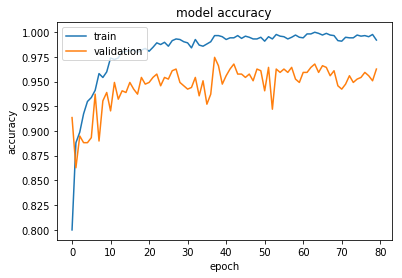

In [65]:
# Training history for model 6
#accuracy
plt.plot(history6.history['acc'])
plt.plot(history6.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

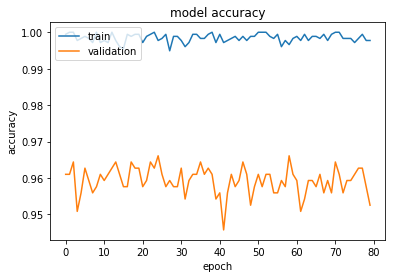

In [67]:
# Training history for model 1
#accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

The above plots looks good: the validation is always below training line, indicating no overfitting. Also, it looks like a number of training epochs around 50 is a good choice. Model 6 was trained with 80 epochs which is still fine. We could probably save some time by running it with 40 epochs and it should not impact the model accuracy.
For Model 8 it looks like higher accuracy could be achieved with shorter training by using approx. 130 epochs. 

#### STEP 5: Training benchmark SVM model.
In order to benchmark our CNN model, we decided to compare it against different methodology: SVM.

**Step 5.1: Convert data to required format - 1D numpy array.**

In [53]:
# reshape img array to vector
def reshape_image(img):
    return np.reshape(img,img.shape[0]*img.shape[1]*img.shape[2])

trainingImages=np.copy(train_tensors)
validImages=np.copy(valid_tensors)
testImages=np.copy(test_tensors)

img_train = np.zeros((len(trainingImages),trainingImages[0].shape[0]*trainingImages[0].shape[1]*trainingImages[0].shape[2]))
img_val = np.zeros((len(validImages),validImages[0].shape[0]*validImages[0].shape[1]*validImages[0].shape[2]))
img_test = np.zeros((len(testImages),testImages[0].shape[0]*testImages[0].shape[1]*testImages[0].shape[2]))

train_lab=train_labels[:,0].astype(int)
val_lab=val_labels[:,0].astype(int)
test_lab=test_labels[:,0].astype(int)

for i in range(0,len(trainingImages)):
    img_train[i] = reshape_image(trainingImages[i])

for i in range(0,len(validImages)):
    img_val[i] = reshape_image(validImages[i])
    
for i in range(0,len(testImages)):
    img_test[i] = reshape_image(testImages[i])
    


## **Step 5.2: Use grid search alogrithm to define best SVM classifier.**

In [54]:
parameters = {'kernel':('linear','rbf','poly'), 'C':[1, 10]}
svc = svm.SVC()
clf_GS = GridSearchCV(svc, parameters)
clf_GS.fit(img_train,train_lab)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf', 'poly'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
clf_GS.best_params_

{'C': 10, 'kernel': 'rbf'}

#### STEP 6: Compare CNN and SVM performance. 
In order to compare CNN and SVM performance we will calculate three performance metrics: accuracy, sensitivity and specificity. 

In [57]:
#Confusion matrix, Accuracy, sensitivity and specificity
def calculate_stats(true_values,predicted_labels,model_name):
    cm1 = confusion_matrix(true_values,predicted_labels)
    print('Confusion Matrix for model {} : \n'.format(model_name),cm1)
    total1=sum(sum(cm1))
    #####from confusion matrix calculate accuracy
    accuracy1=(cm1[0,0]+cm1[1,1])/total1
    print ('Accuracy : {0:.2%}'.format(accuracy1))
    sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Sensitivity {0:.2%}: '.format(sensitivity1))
    specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Specificity {0:.2%}: '.format(specificity1))
    return([sensitivity1,specificity1])

In [68]:
calculate_stats(test_labels_CNN,model_pred,"CNN Model 1")

Confusion Matrix for model CNN Model 1 : 
 [[289   6]
 [  7 288]]
Accuracy : 97.80%
Sensitivity 97.97%: 
Specificity 97.63%: 


[0.9796610169491525, 0.976271186440678]

In [61]:
calculate_stats(test_labels_CNN,model6_pred,"CNN Model 6")

Confusion Matrix for model CNN Model 6 : 
 [[281  14]
 [  7 288]]
Accuracy : 96.44%
Sensitivity 95.25%: 
Specificity 97.63%: 


[0.9525423728813559, 0.976271186440678]

In [89]:
class_predict_best=clf_GS.predict(img_test)

In [90]:
calculate_stats(test_lab,class_predict_best,"Best SVM Classifier")

Confusion Matrix for model Best SVM Classifier : 
 [[249  46]
 [ 19 276]]
Accuracy : 88.98%
Sensitivity 84.41%: 
Specificity 93.56%: 


[0.8440677966101695, 0.9355932203389831]

This image has been incorrectly classified as positive


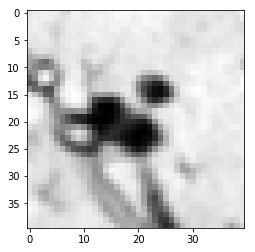

This image has been correctly classified as negative


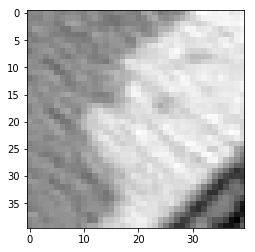

This image has been correctly classified as positive


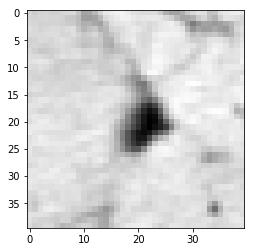

This image has been correctly classified as positive


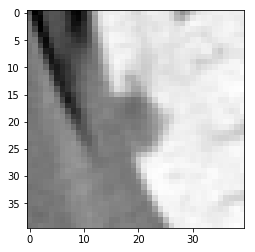

In [59]:
# Example output and classification
pred_ex=model8_pred[0:4]
pred_ex_label=["positive" if x==1 else "negative" for x in pred_ex]
test_labels[1]
for i in range(0,4):
    if pred_ex[i]==np.argmax(test_labels[i],axis=0):
        result="correctly"
    else:
        result="incorrectly"
    print("This image has been {} classified as {}".format(result,pred_ex_label[i]))
    img=mpimg.imread(test_nodules[i])
    plt.imshow(img,cmap=plt.cm.binary)
    plt.show()

In [45]:
test_labels[1]

array([1., 0.])

As per above, our trained CNN model has much better performance than SVM classifier. 